<a href="https://colab.research.google.com/github/strongway/tutorial_data_science/blob/master/lecture_2024/Basic_Artificial_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Neural Networks (ANNs)

Building ANN consists of two steps:

1. Specify the network architecture (Simple Perceptron, Multi-layer forward network, convolutional network etc.)
2. Find best numbers from the data to fill in that template

![ANN](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Artificial_neural_network.svg/440px-Artificial_neural_network.svg.png)


## Perceptron

The perceptron is a simple feedforward network. An input vector $x$ with their weights $w$ to an output 'neuron'. When the summation is greater than a threshold $\theta$, it fires (1), otherwise, it is silent (0).

$$a(x) = 1, \text{ if wx} \gt \theta$$
$$a(x) = 0, \text { otherwise}$$

Note, the activation for above simple Perceptron is a step function!

## Activation function

- Linear activation

If the summation of inputs is simply pass through the note with some linear gating (i.e., linear transformation), this would be a linear activation.

$$A(X) = w_0 + w\cdot X$$

- Step activation

If the node is only activate when the summation passes a certain threshold, this activation is a step activation. This mimick neuron firing (binary states: firing, not firing). A typical step-function activation is used in Perceptron (details in next week).

The perceptron is a simple feedforward network. An input vector $x$ with their weights $w$ to an output 'neuron'. When the summation is greater than a threshold $\theta$, it fires (1), otherwise, it is silent (0).

$$a(x) = 1, \text{ if wx} \gt \theta$$
$$a(x) = 0, \text { otherwise}$$

- Logistic activation

The step activation looks at the single neuron level with two states. When we characterize neuron firing from a group of neuron, we can obtain the firing rate. The firing rate increases when the inputs increase, but the firing rate cannot exceed a certain rate, which motivates the usage of sigmoid function, such as logistic function.

- ReLU activation

There is another popular activation function is the rectified linear unit (ReLU) activation function, which enables better training of deeper networks.

ReLU function is basically the positive part of the input:

$$A(x) = x^+ = max(0, x)$$.





# Working with Keras

## What is Keras?

Keras is a high-level, deep learning API written in Python. It is designed to make it easy to build and train neural networks. Keras runs on top of other deep learning frameworks, such as TensorFlow, Theano, and CNTK.

Here are some of the benefits of using Keras:

- **User-friendly**: Keras provides a simple and intuitive API that is easy to learn and use.
- **Modular**: Keras models are built by connecting together building blocks, which makes them easy to customize and extend.
-**Portable**: Keras models can be run on different platforms, including CPUs, GPUs, and TPUs.
- **Scalable**: Keras can be used to train large and complex neural networks.
Keras is a powerful tool for building and training neural networks. It is a good choice for both beginners and experienced deep learning practitioners.

## How to use Keras?

1. Installation

First, you need to install Keras. If you are using Colab, Keras is already pre-installed. Otherwise, install TensorFlow, which includes Keras:

```
pip install tensorflow
```

2. import necessary modules

```python
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
```

3. define the model

This step is essential and important. If it is feedforward model, create a sequential model which is a linear stack of layers:

```python
model = Sequential()
```

4. Add layers to the model

Add layers to your model using the `add()` method. For a simple feedforward network, use Dense layers:

```python
# Input layer with 12 input features and 64 neurons, 'relu' activation
model.add(Dense(64, input_dim=12, activation='relu'))  
# Hidden layer with 64 neurons, 'relu' activation
model.add(Dense(64, activation='relu'))
# Output layer with 1 neuron for binary classification, 'sigmoid' activation
model.add(Dense(1, activation='sigmoid'))
```

5. Compile the model

```python
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
```

6. Train the model

Train the model using the `fit()` method:
```python
model.fit(X_train, y_train, epochs=10, batch_size=32)
```

X_train and y_train represent your training data and labels. epochs is the number of training iterations, and batch_size is the number of samples processed before the model is updated.

7. Evaluate the model

Finally, evaluate the model's performance on the test data:

```python
loss, accuracy = model.evaluate(X_test, y_test)  
print('Test accuracy:', accuracy)
```

Surely, you need to use the data for prediction new data.

```python
predictions = model.predict(X_new)
```
Important Considerations

- __Activation functions__: Choose appropriate activation functions (like 'relu', 'sigmoid', 'softmax') for different layers based on the task.
- __Optimizers__: Experiment with different optimizers (like 'adam', 'sgd') to find the best one for your model.
- __Loss functions__: Select the right loss function (like 'binary_crossentropy', 'categorical_crossentropy', 'mse') according to your problem type (classification or regression).
- __Hyperparameter tuning__: Adjust the number of layers, neurons, epochs, batch size, and other parameters to optimize your model's performance.


## Building first ANN with Diabetes Dataset

We'll use the Pima Indians Diabetes Dataset. This dataset is available in [Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database). For convenience, I also uploaded to github [here](https://raw.githubusercontent.com/strongway/r-statistics/master/data/diabetes.csv).


According to Kaggle, this dataset

> This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

> The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

> *Acknowledgements*:
Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.linear_model import LogisticRegression


# Let's load the dataset and make visual inspection
data = pd.read_csv('https://raw.githubusercontent.com/strongway/r-statistics/master/data/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [36]:
data.shape

(768, 9)

### Your task

Please first to visualize the data and get sense of it.


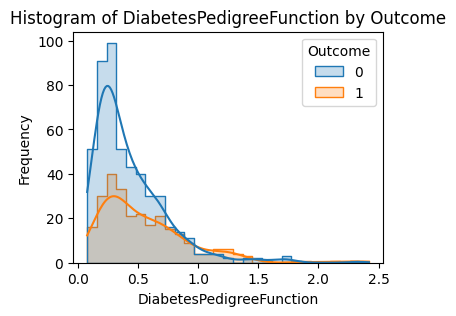

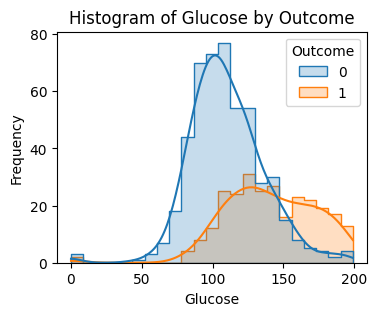

In [7]:
# List of features to visualize, please try other features...
features = ['DiabetesPedigreeFunction',  'Glucose']

# Create histograms for each feature, separated by outcome
for feature in features:
    plt.figure(figsize=(4, 3))
    sns.histplot(data=data, x=feature, hue='Outcome', kde=True, element='step')  # Added kde and element for better visualization
    plt.title(f'Histogram of {feature} by Outcome')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

## Building networks with Keras



In [39]:
# first we separate the inputs and output
X = data.drop('Outcome', axis = 1)
y = data['Outcome']

# Create a simple feedback network
model = Sequential()
# We have 8 input parameters and one output with activation logistic function
model.add(Dense(1, input_dim = 8, activation = 'sigmoid'))
# compile the model
model.compile(loss='binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])
# train the network,
# epochs - how many times you go through your training set
# batch_size: length of x
model.fit(X,y, epochs = 100, batch_size= 20, verbose = 0)
# evaluate the model
model.evaluate(X,y)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6603 - loss: 0.6040


[0.5848782658576965, 0.6940104365348816]

The above shallow network with accuracy above 60%, not bad!

Note that optimization is not unique and fixed, and it depends on the initial starting values. So if the network is not stable, you might need to train multiple times, or specify the initial values.

In [17]:
# compared to logistic regression
mod1 = LogisticRegression()
mod1.fit(X,y)
# print the R^2
print(mod1.score(X,y))


0.7825520833333334


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Question

Based on the above comparison of the simple shallow feedforward network and logistic regression, what is your opinion?

1. When should we use regression and when should we use ANN?
2. In which aspect the ANN has better performance
3. In which aspect the traditional approach is better.

Can we do better job using ANN?

## Multi-layer network

Simple Perceptron can only do linear classifier (see our previous week slides). So we apply multi-layer network to the data, and see how performance could be improved.

Here we have 8 features (input layer), and we plan to have first hidden layer of 12 neurons, and second hiddenn layer of 8 neurons. Both layers using the activation function of 'relu', and final output layer using 'sigmoid'.


In [26]:
# define the  model
model2 = Sequential()
# add a layer with 64 neurons, input 8
model2.add(Dense(__, input_dim=___, activation='relu'))
# add another layer with 32 with acativation function 'relu'
model2.add(___)
# add another layer with 16
model2.add(___)
# final output layer with activation function sigmoid
model2.add(Dense(1, activation='sigmoid'))
model2.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 64)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,201 (12.50 KB)

 Trainable params: 3,201 (12.50 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
# compile the model
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the model to the dataset
model2.fit(X, y, epochs=100, batch_size=20, verbose = 0)
# evaluate the keras model
_, accuracy = model2.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8988 - loss: 0.2456  
Accuracy: 90.23


### Excercise

Please try to modify the above network, e.g. some parameters, and layers, see how the modified network works.

## Another example - Simple MNIST convnet

This is example is from Keras official website. You can [view it Colab](https://colab.research.google.com/github/keras-team/keras-io/blob/master/examples/vision/ipynb/mnist_convnet.ipynb).


### Image Classification with MNIST

Image classification requires a program to accurately categorize an unseen image into its appropriate class. This task proves nearly impossible using traditional programming methods. How can a programmer establish the rules and conditions necessary to classify such a vast array of images, particularly those they have never encountered?

The answer is using deep neural network with sufficient data, and providing the network with feedback on its performance via training.

The accurate image classification of the [MNIST dataset](http://yann.lecun.com/exdb/mnist/), a collection of 70,000 grayscale images of handwritten digits from 0 to 9, marked a major milestone in deep learning. Although this task is now viewed as straightforward, classifying images using MNIST has become a fundamental exercise—often referred to as the "Hello World" of deep learning.



In [18]:
from keras import layers
# Model / data parameters
num_classes = 10


# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [3]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


Here are some images included in the MNIST dataset:

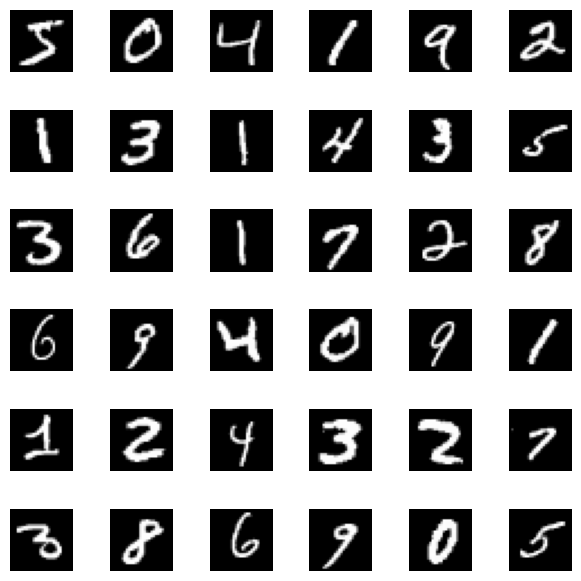

In [4]:
# visualize an image
fig, ax = plt.subplots(6,6, figsize = (6,6))
fig.tight_layout(pad =0.1, rect = [0,0,1,1])
for x, y in [(i,j) for i in range(6) for j in range(6)]:
  ax[y,x].imshow(x_train[x+y*6,:,:].reshape((28,28)), cmap = 'gray')
  ax[y,x].axis('off')


In [19]:
# we first flatten for linear input
x_train_flatten = x_train.reshape(x_train.shape[0],-1)
x_test_flatten = x_test.reshape(x_test.shape[0],-1)
print("x_train shape:", x_train_flatten.shape)
print(x_train_flatten.shape[0], "train samples")
print(x_test_flatten.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train_cat = keras.utils.to_categorical(y_train, num_classes)
y_test_cat = keras.utils.to_categorical(y_test, num_classes)


x_train shape: (60000, 784)
60000 train samples
10000 test samples


In [15]:
y_train_cat.shape

(60000, 10)

In [16]:
# y_train contain 10 categories...
# let's see the first image if it dicates '5'
y_train_cat[0,]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

Build the model

In [17]:
# build a feedforward network

model2 = Sequential()
# first layer input 784, output 512
model2.add(Dense(__, input_dim=___, activation='relu'))
# add another layer
model2.add(___)
# final output layer with 10 categories
model2.add(Dense(___, activation='softmax')) # Use softmax for multi-class classification
model2.summary()

# Compile the model
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # Use categorical_crossentropy for multi-class

# Fit the model (assuming you have x_train_flatten and y_train defined as in the previous code)
model2.fit(x_train_flatten, y_train_cat, epochs=10, batch_size=32) # Adjust epochs and batch_size as needed



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9060 - loss: 0.3081
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9743 - loss: 0.0805
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9837 - loss: 0.0527
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9869 - loss: 0.0414
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9894 - loss: 0.0322
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9915 - loss: 0.0269
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9940 - loss: 0.0195
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9926 - loss: 0.0214
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9941 - loss: 0.0179
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9954 - loss: 0.0149
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9770 - loss: 0.1213
Accuracy: 98.10


The training accuracy is quite high. Let's now do validation with the test set.


In [20]:
# Evaluate the model
_, accuracy = model2.evaluate(x_test_flatten, y_test_cat)
print('Accuracy: %.2f' % (accuracy*100))


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9770 - loss: 0.1213
Accuracy: 98.10


In [23]:
np.set_printoptions(precision=3, suppress=True)
#let's see predictions
predictions = model2.predict(x_test_flatten)
print(predictions[1,:])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


Let's check if the test image is '2'.



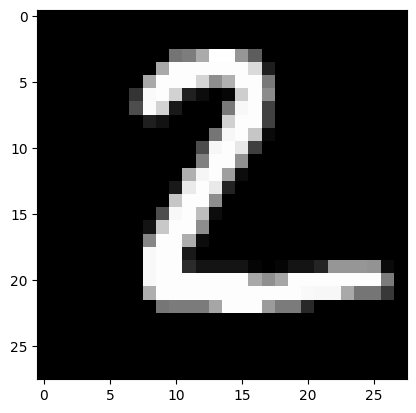

In [24]:
plt.imshow(x_test_flatten[1,:].reshape(28,28), cmap = 'gray')

### Summary

This model did quite well! The accuracy quickly reached close to 100%, and did the validation accuracy.

Note, in this simple network, we transformed 2D images into 1D linear format. Now, take a moment to reflect:

- **What could be potential problems for such transformation?**


### Teaser - CNN network

Convolutional Neural Networks (CNNs) are primarily for processing data that has a grid-like topology, such as images. They excel at tasks like image classification, object detection, and image segmentation.

It typically contains three types of layers:

- **Convolutional Layers**: These layers apply filters (kernels) to the input data to extract features. Filters slide across the input, performing element-wise multiplications and summations to create feature maps. This process helps CNNs detect local patterns and edges in the data.
- **Pooling Layers**: These layers reduce the spatial dimensions of the feature maps, decreasing computational complexity and making the model more robust to variations in the input. Common pooling operations include max pooling and average pooling.
- **Fully Connected Layers**: After several convolutional and pooling layers, fully connected layers are used to connect all neurons in the previous layer to every neuron in the current layer. These layers learn global patterns and relationships between features, ultimately leading to the final output (e.g., class probabilities).

![CNN](https://cdn.analyticsvidhya.com/wp-content/uploads/2024/10/59954intro-to-CNN.webp)

Illustration from https://analyticsvidhya.com/


In [25]:
# here is implementation with CNN

# Make sure images have shape (28, 28, 1)
x_train_e = np.expand_dims(x_train, -1)
x_test_e = np.expand_dims(x_test, -1)
input_shape = (28, 28, 1)

model3 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │          16,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# train the model
batch_size = 128
epochs = 3

model3.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model3.fit(x_train_e, y_train_cat, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/3
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.7713 - loss: 0.7519 - val_accuracy: 0.9800 - val_loss: 0.0791
Epoch 2/3
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9634 - loss: 0.1205 - val_accuracy: 0.9852 - val_loss: 0.0526
Epoch 3/3
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9726 - loss: 0.0880 - val_accuracy: 0.9887 - val_loss: 0.0459


In [28]:
#Evaluate the trained model
score = model3.evaluate(x_test_e, y_test_cat, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Test loss: 0.04401571303606033
Test accuracy: 0.9854000210762024
